In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 读取数据
df = pd.read_csv('Shill Bidding Dataset.csv')

# 2. 仅保留正常竞拍记录
df_normal = df[df['Class'] == 0]

# 3. 提取用户行为特征
selected_features = [
    'Bidder_Tendency', 'Bidding_Ratio', 'Successive_Outbidding',
    'Last_Bidding', 'Early_Bidding', 'Winning_Ratio'
]
user_df = df_normal.groupby('Bidder_ID')[selected_features].mean()

| 特征名                      | 说明              | 是否用于聚类 | 说明              |
| ------------------------ | --------------- | - | --------------- |
| `Bidder_Tendency`        | 用户投标频率（相对于总拍卖数） | ✅ | 衡量参与度           |
| `Bidding_Ratio`          | 用户出价次数 / 拍卖总出价数 | ✅ | 衡量出价主动性         |
| `Successive_Outbidding`  | 用户是否连续压价自己      | ✅ | 衡量激进或刷数据倾向      |
| `Last_Bidding`           | 是否倾向于最后出价       | ✅ | 衡量策略：谨慎/激进      |
| `Early_Bidding`          | 是否在拍卖早期出价       | ✅ | 与上面相反，衡量性格      |
| `Winning_Ratio`          | 赢得拍卖的比例         | ✅ | 衡量有效性           |
| `Auction_Duration`       | 所参拍拍卖的平均持续时长    | ❌ | 用处较小，非行为特征      |
| `Starting_Price_Average` | 起拍价均值           | ❌ | 容易引入偏差          |
| `Auction_Bids`           | 所参与拍卖中出价总数      | ❌ | 拍卖层级特征，不是用户本身行为 |


In [8]:
# 4. 标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(user_df)

# 5. 聚类
kmeans = KMeans(n_clusters=3, random_state=42)
user_df['Cluster'] = kmeans.fit_predict(X_scaled)

In [9]:
# 6. 聚类中心解释
print(user_df.groupby('Cluster').mean())

         Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  Last_Bidding  \
Cluster                                                                        
0               0.220563       0.077620               0.015678      0.681294   
1               0.190037       0.086992               0.005960      0.235508   
2               0.439354       0.188598               0.045727      0.297890   

         Early_Bidding  Winning_Ratio  
Cluster                                
0             0.658644       0.216663  
1             0.218311       0.196757  
2             0.267043       0.720579  


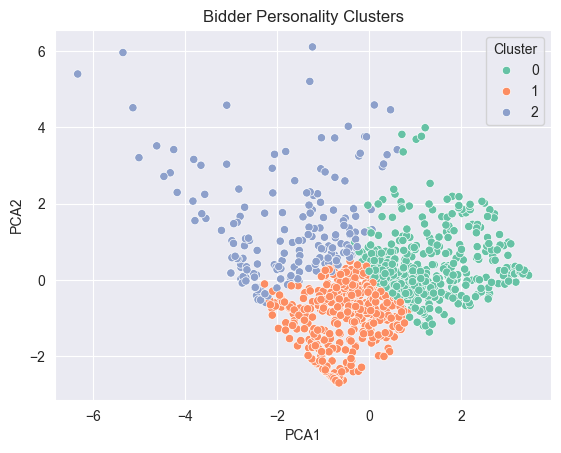

In [10]:
# 7. 可视化
from sklearn.decomposition import PCA
X_pca = PCA(n_components=2).fit_transform(X_scaled)
user_df['PCA1'], user_df['PCA2'] = X_pca[:, 0], X_pca[:, 1]

sns.scatterplot(data=user_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Bidder Personality Clusters")
plt.show()